In [7]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [10]:
data=pd.read_csv('datasetyuvi5.csv')

In [12]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

print("Features:")
display(x)

print("Target:")
display(y)

Features:


,Day,Outlook,Temperature,Humidity,Wind
0,1,Sunny,Hot,High,Weak
1,2,Sunny,Hot,High,Strong
2,3,Cloudy,Hot,High,Weak
3,4,Rain,Mild,High,Weak
4,5,Rain,Cool,Normal,Weak
5,6,Rain,Cool,Normal,Strong
6,7,Cloudy,Cool,Normal,Strong
7,8,Sunny,Mild,High,Weak
8,9,Sunny,Cool,Normal,Weak
9,10,Rain,Mild,Normal,Weak


Target:


0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play, dtype: object

In [55]:
def entropy(target_col):
    values,counts =np.unique(target_col,return_counts=True)
    entropy_value = 0

    for i in range(len(values)):
        probability = counts[i] / np.sum(counts)
        entropy_value+= -probability * math.log2(probability)

    return entropy_value

In [56]:
total_entropy=entropy(y)

In [58]:
def information_gain(data,split_attribute,target_name):
    total_entropy = entropy(data[target_name])
    values,counts = np.unique(data[split_attribute],return_counts = True)
    weighted_entropy = 0
    for i in range(len(values)):
        subset = data[data[split_attribute] == values[i]]
        subset_entropy = entropy(subset[target_name])
        weighted_entropy +=(counts[i]/np.sum(counts))* subset_entropy
        
    IG=total_entropy - weighted_entropy
    return IG

In [59]:
print("Information Gain for each attribute:\n")

for feature in x.columns:
    ig = information_gain(data, feature, y.name)
    print(f"IG({feature}) = {ig:.4f}")

Information Gain for each attribute:

IG(Day) = 0.9403
IG(Outlook) = 0.2467
IG(Temperature) = 0.0292
IG(Humidity) = 0.1518
IG(Wind) = 0.0481


In [60]:
IG_values = {
    feature: information_gain(data, feature, y.name)
    for feature in x.columns
    if feature != "Day"
}

root_node = max(IG_values, key=IG_values.get)
print("Root Node:", root_node)

Root Node: Outlook


In [61]:
print(f"\nChild nodes for root attribute'{root_node}':")
for value in data[root_node].unique():
    subset= data[data[root_node]== value]
    print(f"\n{root_node}={value}")
    display(subset)


Child nodes for root attribute'Outlook':

Outlook=Sunny


,Day,Outlook,Temperature,Humidity,Wind,Play
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
7,8,Sunny,Mild,High,Weak,No
8,9,Sunny,Cool,Normal,Weak,Yes
10,11,Sunny,Mild,Normal,Strong,Yes



Outlook=Cloudy


,Day,Outlook,Temperature,Humidity,Wind,Play
2,3,Cloudy,Hot,High,Weak,Yes
6,7,Cloudy,Cool,Normal,Strong,Yes
11,12,Cloudy,Mild,High,Strong,Yes
12,13,Cloudy,Hot,Normal,Weak,Yes



Outlook=Rain


,Day,Outlook,Temperature,Humidity,Wind,Play
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes
5,6,Rain,Cool,Normal,Strong,No
9,10,Rain,Mild,Normal,Weak,Yes
13,14,Rain,Mild,High,Strong,No


In [63]:
le_dict = {}
x_encoded = x.copy()

for col in x.columns:
    le = LabelEncoder()
    x_encoded[col] = le.fit_transform(x[col])
    le_dict[col] = le

target_le = LabelEncoder()
y_encoded = target_le.fit_transform(y)
dt = DecisionTreeClassifier(criterion="entropy")  
dt.fit(x_encoded, y_encoded)

DecisionTreeClassifier(criterion='entropy')

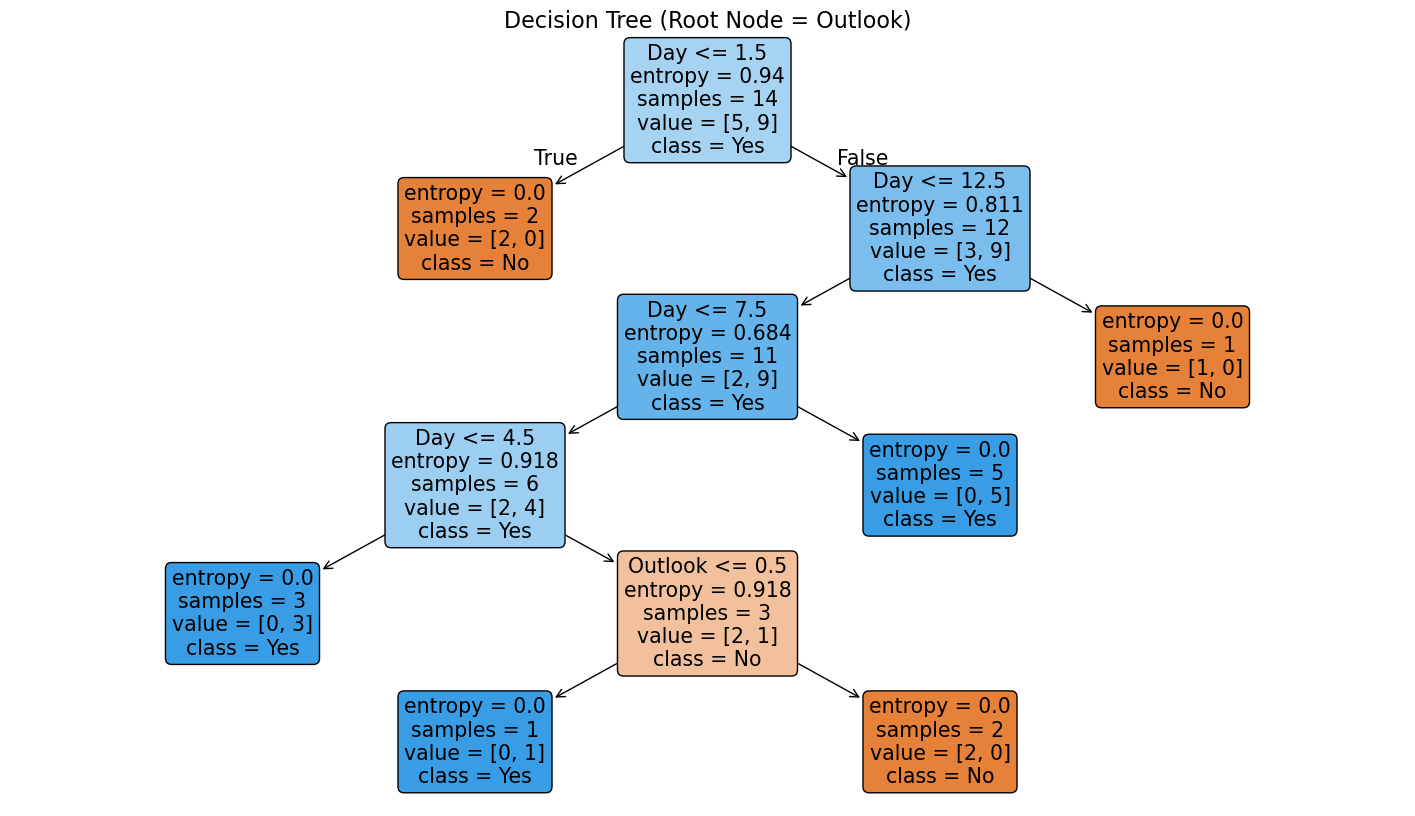

In [66]:
plt.figure(figsize=(18, 10))
plot_tree(
    dt,
    feature_names=x.columns,
    class_names=target_le.classes_,
    filled=True,
    rounded=True
)
plt.title(f"Decision Tree (Root Node = {root_node})", fontsize=16)
plt.show()